### Insurance Fraud Detection

Import Libraries

In [2]:
import warnings
warnings.filterwarnings("ignore")


import os
import re
import json
from datetime import datetime
from datetime import date

#dataframe manipulation
import numpy as np
import pandas as pd

#visualisations
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats
import seaborn as sns
import matplotlib.dates as mdates
plt.style.use('bmh')
from sklearn.metrics import mean_squared_error

#time series data
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

#### Import file

In [14]:
df = pd.read_excel("fraud_data.xlsx", sheet_name = 'Data')
df.head(4)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,Month-Year
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,Dec-1994
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,Jan-1994
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,Oct-1994
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,Jun-1994


#### Exploratory Descriptive Analysis

In [4]:
df.shape

(15420, 33)

There are 33 columns in total with 15420 cases in the dataset

#### Descriptive Analysis - Continuous Variables - Univariate

There are 4 continuous variables in the dataset. These are as follows:
* WeekofMonth
* WeekofMonthClaimed
* Age
* Deductible

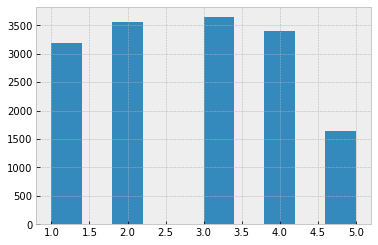

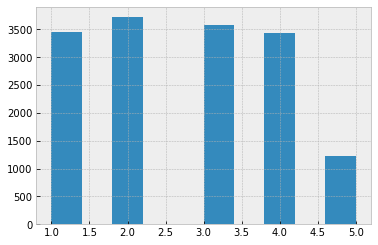

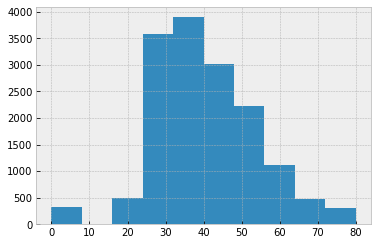

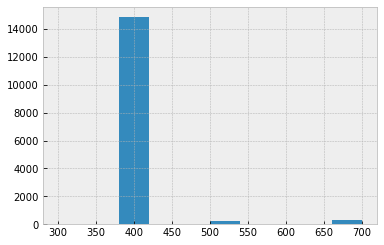

In [5]:
cont_variables = (df['WeekOfMonth'], df['WeekOfMonthClaimed'], df['Age'], df['Deductible'])

for column in cont_variables:
    x = column
    plt.hist(x, bins=10)
    plt.show()


##### Read in GDP data

In [13]:
gdp =  pd.read_excel("fredgraph.xlsx", sheet_name = 'Sheet2')
gdp.head(3)

,observation_date,GDP,GDP_PCH,Quarter
0,1994-01-01,7115.652,1.45306,Q1 1994
1,1994-04-01,7246.931,1.84493,Q2 1994
2,1994-07-01,7331.075,1.16110,Q3 1994


In [15]:
df.head(3)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,Month-Year
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,Dec-1994
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,Jan-1994
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,Oct-1994
